In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
  # (1) INPUT-CONV(32 3*3)-CONV(32 3*3)-RELU-POOL-CONV(32 3*3)- CONV(32 3*3)-RELU-POOL-FC-OUTPUT 구조의 CNN을 작성하고 동일한 학습 과정 수행

  def  __init__(self):
    super(Net, self).__init__()

    p = (2, 2)

    self.conv1 = nn.Conv2d(3, 32, 3, padding=p)
    self.conv2 = nn.Conv2d(32, 32, 3, padding=p)
    
    self.pool =  nn.MaxPool2d(2, 2)

    self.conv3 = nn.Conv2d(32, 32, 3, padding=p)
    self.conv4 = nn.Conv2d(32, 32, 3, padding=p)

    self.fc1 = nn.Linear(3872, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.pool(F.relu(self.conv2(x)))
    x = self.conv3(x)
    x = self.pool(F.relu(self.conv4(x)))
    x = x.view(-1, self.num_flat_features(x))
    x = self.fc1(x)
    
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

In [15]:
model = Net()
classes = ('plane','car','bird','cat','deer', 'dog','frog','horse','ship','truck')

In [3]:
import torch.optim as optim

def train_model(net, criterion, optimizer, trainloader):
  for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data

      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()

      optimizer.step()

      running_loss += loss.item()

      if i % 1000 == 999:
        print('[%d,%5d] loss: %.3f'%(epoch + 1, i + 1, running_loss / 1000))
        running_loss = 0.0
  print("Finished Training")

def test_model(net, testloader):
  correct = 0
  total = 0

  with torch.no_grad():
    for data in testloader:
      images, labels = data
      outputs = net(images)
      predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted[1] == labels).sum().item()
  print('Overall Accuracy: %d%%'%(100 * correct/total))
  cls_correct = list(0. for i in range(10))
  cls_total = list(0. for i in range(10))

  with torch.no_grad():
    for data in testloader:
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs, 1)

      c = (predicted == labels).squeeze()
      for i in range(4):
        label = labels[i]
        cls_correct[label] += c[i].item()
        cls_total[label] += 1
  for i in range(10):
    print('Accuracy of %5s : %2d%%' % (classes[i], 100 * cls_correct[i] /cls_total[i]))

In [4]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [6]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_model(model, criterion, optimizer, trainloader)
print('Finished Training')

[1, 1000] loss: 2.297
[1, 2000] loss: 2.309
[1, 3000] loss: 2.308
[1, 4000] loss: 2.310
[1, 5000] loss: 2.307
[1, 6000] loss: 2.311
[1, 7000] loss: 2.307
[1, 8000] loss: 2.307
[1, 9000] loss: 2.310
[1,10000] loss: 2.309
[1,11000] loss: 2.309
[1,12000] loss: 2.308
[2, 1000] loss: 2.309
[2, 2000] loss: 2.309
[2, 3000] loss: 2.308
[2, 4000] loss: 2.309
[2, 5000] loss: 2.310
[2, 6000] loss: 2.308
[2, 7000] loss: 2.309
[2, 8000] loss: 2.310
[2, 9000] loss: 2.309
[2,10000] loss: 2.308
[2,11000] loss: 2.309
[2,12000] loss: 2.308
Finished Training
Finished Training


In [7]:
test_model(model, testloader)

Overall Accuracy: 10%
Accuracy of plane :  0%
Accuracy of   car :  0%
Accuracy of  bird :  0%
Accuracy of   cat : 100%
Accuracy of  deer :  0%
Accuracy of   dog :  0%
Accuracy of  frog :  0%
Accuracy of horse :  0%
Accuracy of  ship :  0%
Accuracy of truck :  0%


In [8]:
# (2) 3번 문제의 신경망에 Adam 최적화 (강의자료의 기본 hyper-parameters 사용) 적용

optimizer = optim.Adam(model.parameters(), betas=(0.9, 0.999), lr=1e-2)
train_model(model, criterion, optimizer, trainloader)

test_model(model, testloader)


[1, 1000] loss: 2.308
[1, 2000] loss: 2.304
[1, 3000] loss: 2.307
[1, 4000] loss: 2.306
[1, 5000] loss: 2.307
[1, 6000] loss: 2.307
[1, 7000] loss: 2.306
[1, 8000] loss: 2.308
[1, 9000] loss: 2.306
[1,10000] loss: 2.306
[1,11000] loss: 2.306
[1,12000] loss: 2.306
[2, 1000] loss: 2.306
[2, 2000] loss: 2.307
[2, 3000] loss: 2.307
[2, 4000] loss: 2.307
[2, 5000] loss: 2.306
[2, 6000] loss: 2.307
[2, 7000] loss: 2.306
[2, 8000] loss: 2.306
[2, 9000] loss: 2.306
[2,10000] loss: 2.306
[2,11000] loss: 2.307
[2,12000] loss: 2.306
Finished Training
Overall Accuracy: 10%
Accuracy of plane :  0%
Accuracy of   car :  0%
Accuracy of  bird :  0%
Accuracy of   cat :  0%
Accuracy of  deer :  0%
Accuracy of   dog : 100%
Accuracy of  frog :  0%
Accuracy of horse :  0%
Accuracy of  ship :  0%
Accuracy of truck :  0%


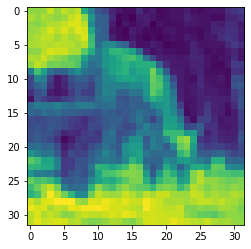

deer 
[1, 1000] loss: 2.305
[1, 2000] loss: 2.304
[1, 3000] loss: 2.303
[1, 4000] loss: 2.303
[1, 5000] loss: 2.303
[1, 6000] loss: 2.303
[1, 7000] loss: 2.303
[1, 8000] loss: 2.304
[1, 9000] loss: 2.303
[1,10000] loss: 2.303
[1,11000] loss: 2.304
[1,12000] loss: 2.301
[2, 1000] loss: 2.303
[2, 2000] loss: 2.303
[2, 3000] loss: 2.303
[2, 4000] loss: 2.303
[2, 5000] loss: 2.303
[2, 6000] loss: 2.303
[2, 7000] loss: 2.303
[2, 8000] loss: 2.303
[2, 9000] loss: 2.303
[2,10000] loss: 2.304
[2,11000] loss: 2.303
[2,12000] loss: 2.303
Finished Training
Overall Accuracy: 10%
Accuracy of plane :  0%
Accuracy of   car :  0%
Accuracy of  bird :  0%
Accuracy of   cat :  0%
Accuracy of  deer : 100%
Accuracy of   dog :  0%
Accuracy of  frog :  0%
Accuracy of horse :  0%
Accuracy of  ship :  0%
Accuracy of truck :  0%


In [9]:
# (3) 데이터 확대 방법들 중 하나를 적용한 후, 3번 문제의 신경망 학습 (Hint: transforms)
# transforms로 데이터 확대
# ColorJitter 사용

import PIL
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

transform_train = transforms.Compose([
 transforms.ColorJitter(),
 transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5))
])

transform_test = transforms.Compose([
 transforms.ToTensor(),
 transforms.Normalize((0.5, 0.5, 0.5),
 (0.5, 0.5, 0.5))
])

# Check ColorJitter data 
dataiter = iter(trainloader)
images, labels = dataiter.next()

plt.imshow(images[0][0])
plt.show()
print('%s ' % classes[labels[0]])

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_model(model, criterion, optimizer, trainloader)
test_model(model, testloader)

In [10]:
# (4) 3번 문제의 신경망에 배치 정규화를 적용 (Hint: nn.BatchNorm)
import torch.nn as nn
import torch.nn.functional as F

class BatchNormNet(nn.Module):
  def __init__(self):
    super(BatchNormNet, self).__init__()
    self.conv1 =nn.Conv2d(3, 6, 5)
    self.bn1 = nn.BatchNorm2d(6)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    self.bn2 = nn.BatchNorm2d(16)
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.bn1(self.conv1(x))))
    x = self.pool(F.relu(self.bn2(self.conv2(x))))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return x

model = BatchNormNet()
criterion = nn.CrossEntropyLoss()
optimezer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

train_model(model, criterion, optimizer, trainloader)
test_model(model, testloader)

[1, 1000] loss: 2.303
[1, 2000] loss: 2.302
[1, 3000] loss: 2.303
[1, 4000] loss: 2.303
[1, 5000] loss: 2.302
[1, 6000] loss: 2.304
[1, 7000] loss: 2.300
[1, 8000] loss: 2.304
[1, 9000] loss: 2.304
[1,10000] loss: 2.303
[1,11000] loss: 2.302
[1,12000] loss: 2.305
[2, 1000] loss: 2.302
[2, 2000] loss: 2.304
[2, 3000] loss: 2.304
[2, 4000] loss: 2.304
[2, 5000] loss: 2.304
[2, 6000] loss: 2.303
[2, 7000] loss: 2.302
[2, 8000] loss: 2.305
[2, 9000] loss: 2.303
[2,10000] loss: 2.303
[2,11000] loss: 2.303
[2,12000] loss: 2.299
Finished Training
Overall Accuracy: 10%
Accuracy of plane :  4%
Accuracy of   car : 80%
Accuracy of  bird :  0%
Accuracy of   cat :  5%
Accuracy of  deer :  0%
Accuracy of   dog :  7%
Accuracy of  frog :  0%
Accuracy of horse :  0%
Accuracy of  ship :  0%
Accuracy of truck :  6%


In [11]:
# (5) 3번 문제의 신경망에 로그우도 (-log) 손실함수를 적용

class LogNet(nn.Module):
  def __init__(self):
    super(LogNet, self).__init__()
    self.conv1 =nn.Conv2d(3, 6, 5)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(6, 16, 5)
    
    self.fc1 = nn.Linear(16*5*5, 120)
    self.fc2 = nn.Linear(120, 84)
    self.fc3 = nn.Linear(84, 10)

  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = x.view(-1, 16*5*5)
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = self.fc3(x)

    return F.log_softmax(x, dim=1)

model = LogNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_model(model, criterion, optimizer, trainloader)
test_model(model, testloader)

[1, 1000] loss: 2.157
[1, 2000] loss: 2.031
[1, 3000] loss: 1.989
[1, 4000] loss: 1.941
[1, 5000] loss: 1.941
[1, 6000] loss: 1.920
[1, 7000] loss: 1.953
[1, 8000] loss: 1.922
[1, 9000] loss: 1.960
[1,10000] loss: 1.951
[1,11000] loss: 1.948
[1,12000] loss: 1.952
[2, 1000] loss: 1.940
[2, 2000] loss: 1.961
[2, 3000] loss: 1.995
[2, 4000] loss: 1.955
[2, 5000] loss: 1.969
[2, 6000] loss: 1.982
[2, 7000] loss: 1.989
[2, 8000] loss: 1.966
[2, 9000] loss: 1.976
[2,10000] loss: 1.964
[2,11000] loss: 1.977
[2,12000] loss: 2.013
Finished Training
Overall Accuracy: 23%
Accuracy of plane : 13%
Accuracy of   car :  2%
Accuracy of  bird :  0%
Accuracy of   cat : 46%
Accuracy of  deer : 28%
Accuracy of   dog :  0%
Accuracy of  frog :  0%
Accuracy of horse : 40%
Accuracy of  ship : 36%
Accuracy of truck : 67%


In [16]:
# (6) 3번 문제의 신경망에 L2놈 규제 적용
model = Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-4)
criterion = nn.CrossEntropyLoss()

train_model(model, criterion, optimizer, trainloader)
test_model(model, testloader)

[1, 1000] loss: 2.271
[1, 2000] loss: 2.317
[1, 3000] loss: 2.335
[1, 4000] loss: 2.308
[1, 5000] loss: 2.309
[1, 6000] loss: 2.309
[1, 7000] loss: 2.308
[1, 8000] loss: 2.307
[1, 9000] loss: 2.309
[1,10000] loss: 2.308
[1,11000] loss: 2.309
[1,12000] loss: 2.308
[2, 1000] loss: 2.309
[2, 2000] loss: 2.309
[2, 3000] loss: 2.307
[2, 4000] loss: 2.308
[2, 5000] loss: 2.310
[2, 6000] loss: 2.308
[2, 7000] loss: 2.309
[2, 8000] loss: 2.309
[2, 9000] loss: 2.308
[2,10000] loss: 2.308
[2,11000] loss: 2.308
[2,12000] loss: 2.307
Finished Training
Overall Accuracy: 10%
Accuracy of plane :  0%
Accuracy of   car : 100%
Accuracy of  bird :  0%
Accuracy of   cat :  0%
Accuracy of  deer :  0%
Accuracy of   dog :  0%
Accuracy of  frog :  0%
Accuracy of horse :  0%
Accuracy of  ship :  0%
Accuracy of truck :  0%


In [17]:
# (7) 5번 문제에서 사용한 꽃 사진 데이터를 3번 문제의 신경망에 적용

# flower dataset 사용
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from torchvision.datasets import ImageFolder
import pathlib

from tensorflow import keras

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

batch_size = 32
img_height = 180
img_width = 180

228827136/228813984 [==============================] - 3s 0us/step


In [18]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [19]:
pathlib.Path(data_dir)

PosixPath('/root/.keras/datasets/flower_photos')

In [20]:
os.listdir("/root/.keras/datasets/flower_photos")

['daisy', 'roses', 'LICENSE.txt', 'tulips', 'sunflowers', 'dandelion']

In [21]:
from torchvision.datasets import ImageFolder
import torchvision.transforms as transforms
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

transform = transforms.Compose([transforms.Resize((16, 16)), transforms.ToTensor(),transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
dataset = ImageFolder(root='/root/.keras/datasets/flower_photos', transform = transform)
classes = ('daisy', 'roses', 'tulips', 'sunflowers', 'dandelion')

# network
class Second_Net(nn.Module):
  # (1) INPUT-CONV(32 3*3)-CONV(32 3*3)-RELU-POOL-CONV(32 3*3)- CONV(32 3*3)-RELU-POOL-FC-OUTPUT 구조의 CNN을 작성하고 동일한 학습 과정 수행

  def  __init__(self):
    super(Second_Net, self).__init__()

    p = (2, 2)

    self.conv1 = nn.Conv2d(3, 32, 3, padding=p)
    self.conv2 = nn.Conv2d(32, 32, 3, padding=p)
    
    self.pool =  nn.MaxPool2d(2, 2)

    self.conv3 = nn.Conv2d(32, 32, 3, padding=p)
    self.conv4 = nn.Conv2d(32, 32, 3, padding=p)

    self.fc1 = nn.Linear(1568, 10)

  def forward(self, x):
    x = self.conv1(x)
    x = self.pool(F.relu(self.conv2(x)))
    x = self.conv3(x)
    x = self.pool(F.relu(self.conv4(x)))
    x = x.view(-1, self.num_flat_features(x))
    x = self.fc1(x)
    
    return x

  def num_flat_features(self, x):
    size = x.size()[1:]
    num_features = 1
    for s in size:
      num_features *= s
    return num_features

def train_model(net, criterion, optimizer, trainloader):
  for epoch in range(20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
      inputs, labels = data

      optimizer.zero_grad()
      outputs = net(inputs)
      loss = criterion(outputs, labels)
      loss.backward()

      optimizer.step()

      running_loss += loss.item()

      if i % 100 == 99:
        print('[%d,%5d] loss: %.3f'%(epoch + 1, i + 1, running_loss / 100))
        running_loss = 0.0
  print("Finished Training")

def test_model(net, testloader):
  correct = 0
  total = 0

  with torch.no_grad():
    for data in testloader:
      images, labels = data
      outputs = net(images)
      predicted = torch.max(outputs.data,1)
      total += labels.size(0)
      correct += (predicted[1] == labels).sum().item()
  print('Overall Accuracy: %d%%'%(100 * correct/total))
  cls_correct = list(0. for i in range(10))
  cls_total = list(0. for i in range(10))

  with torch.no_grad():
    for data in testloader:
      images, labels = data
      outputs = net(images)
      _, predicted = torch.max(outputs, 1)

      c = (predicted == labels).squeeze()
      for i in range(4):
        try:
          label = labels[i]
          cls_correct[label.item()] += int(c[i].item())
          cls_total[label] += 1
        except IndexError:
          pass
  for i in range(5):
    print('Accuracy of %5s : %2d%%' % (classes[i], 100 * cls_correct[i] /cls_total[i]))

# 70% ,test 30% 로 분할 검증
train_set, test_set = torch.utils.data.random_split(dataset, [2569, 1101])

trainloader = torch.utils.data.DataLoader(train_set, batch_size=4, shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_set, batch_size=4, shuffle=True, num_workers=2)

model = Second_Net()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=1e-5)
criterion = nn.CrossEntropyLoss()

train_model(model, criterion, optimizer, trainloader)
test_model(model, testloader)

[1,  100] loss: 1.764
[1,  200] loss: 1.548
[1,  300] loss: 1.537
[1,  400] loss: 1.578
[1,  500] loss: 1.555
[1,  600] loss: 1.521
[2,  100] loss: 1.568
[2,  200] loss: 1.604
[2,  300] loss: 1.632
[2,  400] loss: 1.631
[2,  500] loss: 1.665
[2,  600] loss: 1.634
[3,  100] loss: 1.613
[3,  200] loss: 1.601
[3,  300] loss: 1.605
[3,  400] loss: 1.600
[3,  500] loss: 1.571
[3,  600] loss: 1.592
[4,  100] loss: 1.530
[4,  200] loss: 1.590
[4,  300] loss: 1.656
[4,  400] loss: 1.612
[4,  500] loss: 1.612
[4,  600] loss: 1.607
[5,  100] loss: 1.568
[5,  200] loss: 1.608
[5,  300] loss: 1.561
[5,  400] loss: 1.610
[5,  500] loss: 1.588
[5,  600] loss: 1.592
[6,  100] loss: 1.564
[6,  200] loss: 1.538
[6,  300] loss: 1.574
[6,  400] loss: 1.588
[6,  500] loss: 1.560
[6,  600] loss: 1.585
[7,  100] loss: 1.524
[7,  200] loss: 1.535
[7,  300] loss: 1.544
[7,  400] loss: 1.555
[7,  500] loss: 1.529
[7,  600] loss: 1.574
[8,  100] loss: 1.558
[8,  200] loss: 1.510
[8,  300] loss: 1.483
[8,  400] 